### Desafio Passei Direto 
### Entrega 12/12/19
### Autor: Sergio Laranjeira

In [1]:
# Imports
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Arquivos
filename='/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseA/premium_students.json'
## Arquivos questoes 2, 3, 4, 5, 6 e 7
answers = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/answers.json'
evaluations = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/evaluations.json/evaluations.json'
views = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/fileViews.json'
p_canc = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/premium_cancellations.json'
p_paym = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/premium_payments.json'
quest = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/questions.json'
sess = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/sessions.json'
stu = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/students.json'
stu_p_view = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/studyPlanViews.json'
subjects = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/subjects.json'
textBookSolutionViews = '/home/selaranjeira/Desktop/passeiDireto/dados/Datasets_Passei_Direto/baseB/textBookSolutionViews.json'

## PERGUNTA 1)

* Dentre os usuários cadastrados em Nov/2017 que assinaram o Plano Premium, qual a probab do usuário virar Premium após o cadastro em ranges de dias? 

                     ** A escolhados ranges deve ser feita por você, tendo em vista os insights que podemos tirar para o negócio

In [3]:
# Questao 1 envolve a tabela filename:
df_premium = pd.read_json(filename)

In [4]:
#df_premium.dtypes
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 6260 entries, 0 to 6259
# Data columns (total 3 columns):
# RegisteredDate      6260 non-null object
# StudentId           6260 non-null int64
# SubscriptionDate    6260 non-null object
# dtypes: int64(1), object(2)
# memory usage: 146.8+ KB

# Valores missing?
# df_premium.isnull().values.any()
# False

In [5]:
#Tratando os dados:
df_premium['RegisteredDate_new'] = pd.to_datetime(df_premium['RegisteredDate'])
df_premium['SubscriptionDate_new'] = pd.to_datetime(df_premium['SubscriptionDate'])
df_premium = df_premium.drop(columns=['RegisteredDate', 'SubscriptionDate'], axis=1)
df_premium['diff'] = df_premium['SubscriptionDate_new'] - df_premium['RegisteredDate_new'] #subs pos cadastro. 
# lapso temporal entre registro e posterior subscricao.

In [6]:
df_premium.head(3)

,StudentId,RegisteredDate_new,SubscriptionDate_new,diff
0,98723802,2017-11-01 00:06:09.988381,2017-11-01 01:20:11.000000,0 days 01:14:01.011619
1,86905029,2017-11-01 00:19:31.215160,2017-11-17 21:58:57.163663,16 days 21:39:25.948503
2,40935842,2017-11-01 00:23:43.138459,2017-11-01 01:26:17.114303,0 days 01:02:33.975844


In [7]:
#any(df_premium['SubscriptionDate_new'].duplicated()) 
#True: pessoas dif estao subscr na mesma hora.

In [8]:
#df_premium[df_premium.duplicated(keep=False)]
# sem dados duplicados.

obs: registros duplicados em RegisteredDate_new e SubscriptionDate_new mas com estudantes unicos. - ok

In [9]:
print(df_premium['diff'].min(), df_premium['diff'].max())
print(df_premium['diff'].max() - df_premium['diff'].min())
# para esse grupo de pessoas, o range max na dist (entre registro e posterior subscricao) foi de 216 dias (aprox 7 meses)

0 days 00:01:00.507848 216 days 20:22:54.111285
216 days 20:21:53.603437


In [10]:
#df_premium.tail()

In [11]:
#df_premium['SubscriptionDate_new'].min(), df_premium['SubscriptionDate_new'].max()

In [12]:
#df_premium['RegisteredDate_new'].min(), df_premium['RegisteredDate_new'].max()

Para responder a primeira questao queremos ver a distribuicao da coluna diff. Propomos a geracao do histograma (coluna que calcula o valor do tempo entre o registro e a subscricao). Em seguida verificar suas estatisticas basicas para extrair informacao. Sendo assim,

In [13]:
media = round(df_premium['diff'].astype('timedelta64[h]').mean(), 2)
desvio = round(df_premium['diff'].astype('timedelta64[h]').std(), 2)
print('media_dias = ', media/24), print('desvio = ', desvio)

media_dias =  53.89041666666666
desvio =  1843.85


(None, None)

Para esse conjunto de dados, na media, em 54 dias pos registro, tem-se a subscricao 

In [14]:
# variaveis hist (array de frequencias) e bin_edges (intervalos medidos em horas) para analise.
hist,bin_edges = np.histogram(df_premium['diff'].astype('timedelta64[h]'))

print('total de subscricoes por intervalo: ', (hist))
print('intervalo em horas:', (bin_edges))
print('intervalo em dias:', (bin_edges/24))

total de subscricoes por intervalo:  [4112  157    7   30   86  219  307  424  654  264]
intervalo em horas: [   0.   520.4 1040.8 1561.2 2081.6 2602.  3122.4 3642.8 4163.2 4683.6
 5204. ]
intervalo em dias: [  0.          21.68333333  43.36666667  65.05        86.73333333
 108.41666667 130.1        151.78333333 173.46666667 195.15
 216.83333333]


### A figura abaixo ilustra melhor os intervalos (medido em horas) e sua respectiva frequencia:

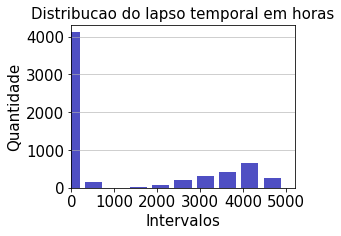

In [15]:
plt.figure(figsize=[4,3])

plt.bar(bin_edges[:-1], hist, width = 400, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Intervalos',fontsize=15)
plt.ylabel('Quantidade',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distribucao do lapso temporal em horas',fontsize=15)
#plt.savefig('hourly.png')
plt.show()

### Observamos que, embora os dados se encontrem espalhados (alto desvio), podemos notar que ha tendencia formada em dois grupos distintos. 
* No intervalo 0-520hr (dentro de 21 dias pos registro), a frequencia mais alta (4112 subscricoes) foi observada. Isto representa a fatia de 66% dos estudantes (4112/6260). 
* Alternativamente, no intervalo 4163.2-4683.6hr (apos aproximadamente 6 meses) encontra-se o segundo maior pico com 654 subscricoes, representando a fatia de aprox 10% dos estudantes, o que responde a primeira questao.

## PERGUNTA 2)

* fazer uma análise mais completa dos nossos usuários e suas ações no Passei Direto. Será usada a BASE B:

### Comecamos pela tabela Students:
* queremos o perfil de cada estudante para conhecer melhor o usuario

In [16]:
df_stu = pd.read_json(stu)

In [17]:
df_stu.head(3)

,City,CourseName,Id,RegisteredDate,SignupSource,State,StudentClient,UniversityName
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO
1,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,NaN,UFF
2,NaN,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,NaN,UNB


In [18]:
#origem do usuario (primordialmente oriundo do Facebook)
df_stu.SignupSource.value_counts()

Facebook    30151
Google      19555
Email       10294
Name: SignupSource, dtype: int64

In [19]:
#Top 20 cursos:
df_stu.CourseName.value_counts()[:20]

Direito                               9862
Administração                         4099
Engenharia Civil                      3585
Contabilidade / Ciências Contábeis    2744
Pedagogia                             2627
Psicologia                            2155
Enfermagem                            2054
Medicina                              1656
Fisioterapia                          1464
Engenharia Mecânica                   1451
Nutrição                              1297
Farmácia / Ciências Farmacêuticas     1142
Educação Física                       1076
Engenharia de Produção                1053
Odontologia                            985
Engenharia Elétrica                    957
Veterinária / Medicina Veterinária     890
Biologia / Ciências Biológicas         753
Arquitetura e Urbanismo                724
Gestão de Recursos Humanos             645
Name: CourseName, dtype: int64

In [20]:
# plt.figure(figsize=(8,4))
# df_stu['CourseName'].value_counts()[:20].plot(kind='pie')
# plt.show()

In [21]:
# Estado de atuacao com mais de 500 usuarios:
print(df_stu.State.value_counts()[:12])
# plt.figure(figsize=(8,4))
# df_stu['State'].value_counts()[:12].plot(kind='pie')
# plt.show()

Rio de Janeiro       5201
São Paulo            3873
Minas Gerais         2363
Paraná               1395
Bahia                1314
Ceara                1194
Rio Grande do Sul    1110
Pernambuco            896
Santa Catarina        853
Goias                 728
Pará                  561
Espirito Santo        560
Name: State, dtype: int64


In [22]:
# Top 10 Universidades:
df_stu.UniversityName.value_counts()[:10]
# plt.figure(figsize=(8,4))
# df_stu['UniversityName'].value_counts()[:10].plot(kind='pie')
# plt.show()

ESTÁCIO                 8919
UNIP                    4392
UNOPAR                  1784
UNINTER                 1780
ESTÁCIO EAD             1446
UNIDERP - ANHANGUERA     671
Anhanguera               660
USP-SP                   601
PITÁGORAS                556
UFRJ                     530
Name: UniversityName, dtype: int64

Usando a tabela Subjects

In [23]:
df_subjects = pd.read_json(subjects)

In [24]:
df_subjects.head(3)

,FollowDate,StudentId,SubjectName
0,2015-09-12 16:00:11.000000,12970655,Disciplina Integradora II
1,2015-09-12 16:00:11.000000,12970655,Pesquisa Operacional
2,2016-06-07 17:07:35.000000,12970655,Cálculo I


In [25]:
# Top 10 materiais procurados
df_subjects.SubjectName.value_counts()[:10]
# plt.figure(figsize=(8,4))
# df_subjects['SubjectName'].value_counts()[:10].plot(kind='pie')
# plt.show()

Bioquímica                  4229
Cálculo I                   4128
Anatomia Humana             3989
Direito Constitucional      3928
Matemática Financeira       3418
Física I                    3091
Direito Penal I             2968
Direito Constitucional I    2894
Fisiologia Humana           2859
Cálculo II                  2572
Name: SubjectName, dtype: int64

### Conclusoes gerais:

* Em sua maioria, os usuarios sao do RJ, o curso de Direito eh o curso com fatia de representacao mais elevada e a plataforma do Facebook eh o principal canal de ligacao. 

* A Univ onde ha maior qde de usuarios eh a Estacio. 

* O material mais pesquisado corresponde a area de exatas lidera com 13209 (Cálculo I, Matemática Financeira, Física I, Cálculo II), em seguida a Area de saude, atraves de Bioquimica (primeiro lugar), Anatomia (terceiro) e Fisiologia Humana (nono) totalizando 11077. Por fim, humanas com 9790 (Dir Constitucional, Constitucional I e Penal I)

## PERGUNTA 3)

* Faça uma análise comparativa do comportamento dos usuários não Premium e dos usuários Premium. Que tipos de ações podemos direcionar para usuários não Premium fazerem com o objetivo de termos um maior número de assinantes?

Utilizarei como estrategia a uniao da tabela students com as tabelas onde encontramos as disciplinas seguidas e principalmente arquivos visualizados.

In [26]:
df_pp = pd.read_json(p_paym)

In [27]:
df_pp.head()

,PaymentDate,PlanType,StudentId
0,2017-05-26 22:25:03.000000,Anual,12970655
1,2018-05-26 10:05:28.000000,Anual,12970655
2,2016-07-21 19:57:57.717000,Mensal,12970655
3,2016-08-21 08:47:42.947000,Mensal,12970655
4,2016-09-21 08:54:06.270000,Mensal,12970655


In [28]:
df_1 = pd.merge(df_stu, df_pp, left_on='Id', right_on='StudentId', how='left')

In [29]:
df_1.head()

,City,CourseName,Id,RegisteredDate,SignupSource,State,StudentClient,UniversityName,PaymentDate,PlanType,StudentId
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-05-26 22:25:03.000000,Anual,12970655.0
1,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2018-05-26 10:05:28.000000,Anual,12970655.0
2,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-07-21 19:57:57.717000,Mensal,12970655.0
3,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-08-21 08:47:42.947000,Mensal,12970655.0
4,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-09-21 08:54:06.270000,Mensal,12970655.0


In [30]:
unicos = set(df_1['SignupSource'])
print(unicos)

{'Email', 'Google', 'Facebook'}


In [31]:
unicos1 = set(df_1['PlanType'])
print(unicos1)

{nan, 'Anual', 'Mensal'}


In [32]:
df_session = pd.read_json(sess)

In [33]:
# df_session.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1399062 entries, 0 to 1399061
# Data columns (total 3 columns):
# SessionStartTime    1399062 non-null object
# StudentClient       1399062 non-null object
# StudentId           1399062 non-null int64
# dtypes: int64(1), object(2)
# memory usage: 32.0+ MB


In [34]:
df_2 = pd.merge(df_1, df_session, left_on='Id', right_on='StudentId', how='outer')

In [35]:
df_2.head()

,City,CourseName,Id,RegisteredDate,SignupSource,State,StudentClient_x,UniversityName,PaymentDate,PlanType,StudentId_x,SessionStartTime,StudentClient_y,StudentId_y
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-05-26 22:25:03.000000,Anual,12970655.0,2017-02-20 14:51:37,Website,12970655
1,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-05-26 22:25:03.000000,Anual,12970655.0,2017-02-22 14:04:34,Website,12970655
2,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-05-26 22:25:03.000000,Anual,12970655.0,2017-02-23 13:46:14,Website,12970655
3,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-05-26 22:25:03.000000,Anual,12970655.0,2017-02-23 14:52:24,Website,12970655
4,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-05-26 22:25:03.000000,Anual,12970655.0,2017-03-03 20:47:21,Website,12970655


Estudar os casos onde temos os grupos premium e nao premium

## PERGUNTA 4)

* Em Novembro de 2017 fizemos uma grande mudança no PD: o Content Restriction. Os usuários não Premium passaram a poder consumir no máximo 3 arquivos diferentes por mês. Diante dessa mudança, qual passou a ser o Lifetime Value (LTV) dos usuários Premium a partir de Novembro de 2017?

### formula(1) LTV = (ticket médio × média de compras por cliente a cada ano) × média de tempo de relacionamento 
### average purchase value x average frequency rate x average customer lifespan).
### https://mobiledevmemo.com/ltv-for-freemium-products/
### primeira coisa e calcular o churn rate mensal, em seguida, assumindo 30,00 /mes e freq = 1, temos o LTV pela formula (1)
### formula(2) churn_rate =  num clientes q cancelaram o servico durante o mes / num clientes ativos no inicio do mes

In [48]:
df_churn = pd.read_json(p_canc)

In [49]:
df_churn.head()

,CancellationDate,StudentId
0,2016-05-05 19:08:31.937000,34129668
1,2016-05-05 22:48:20.830000,34129668
2,2016-05-20 22:37:21.117000,82394932
3,2016-05-31 13:44:55.307000,82942835
4,2016-06-01 14:22:19.467000,85382416


In [50]:
# df_churn.dtypes
# CancellationDate    object
# StudentId            int64
#print(df_churn['CancellationDate'].astype('timedelta64[h]').min(), df_churn['CancelationDate'].astype('timedelta64[h]').max())
# import datetime

# date_time_str = 'Jun 28 2018  7:40AM' - '%b %d %Y %I:%M%p'
# date_time_obj = datetime.datetime.strptime(date_time_str, '%b %d %Y %I:%M%p')

In [51]:
#df_churn['CancellationDate_new'] = pd.to_datetime(df_churn['CancellationDate'])

In [53]:
#new_dates, new_times = zip(*[(d.date(), d.time()) for d in df_churn['CancellationDate_new']])
#df_churn = df_churn.assign(new_date=new_dates, new_time=new_times)

In [54]:
#df_churn.head()

In [55]:
#df_churn.dtypes

In [56]:
#df_churn_1 = df_churn.groupby(by=[df_churn['CancellationDate_new'].index.month, df_churn['CancellationDate_new'].index.year])

In [60]:
#df_churn['new_date'].min()
#df_churn['new_date'].max()

## PERGUNTA 5)

* Entre os usuários que "Churnaram" solicitando ativamente o cancelamento do Plano Premium, o que está fortemente correlacionado com o cancelamento? (Ex: uso das features, tempo de inatividade, etc)

#### fazer o heatmap com as correlacoes na tabela resultante da uniao entre students, premium, session

## PERGUNTA 6)
* Quais são as 5 maiores universidades no Passei Direto?

### 5 Maiores Univ:
* ESTÁCIO - 8919
* UNIP - 4392
* UNOPAR -1784
* UNINTER - 1780
* ESTÁCIO EAD - 1446

## PERGUNTA 7)

* Considerando o seu conhecimento da plataforma do Passei Direto e a análise dos dados disponibilizados nesse teste, que oportunidades você vê para melhorarmos a experiência dos nossos usuários? Ofereça insights explorando o como e o porquê.

### i) Analise de texo para verificacao do "sentimento" do usuario em relacao ao conteudo visualizado. 
### ii) Aplicacao de modelo de aprendizado de maquina para classificacao binaria (regressao logistica) para previsao de churn  assinantes.